In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data 
data = pd.read_csv('/Users/mario.iuliano/marios_env/Portfolio/test/feature_selection/churn/telco.csv')

In [3]:
# Drop unnecessary columns
data.drop(columns=['customerID', 'TotalCharges'], inplace=True)

In [5]:
# Encode data
encoded_data = pd.get_dummies(data.drop(columns=['Churn']), drop_first=True)

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

In [ ]:
# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Churn"] = df["Churn"].values

array([[-0.73588233, -2.47802421],
       [-0.26729101, -0.61297987],
       [-0.41022616, -1.68598813],
       ...,
       [-0.60143183, -1.71683316],
       [-0.84839394, -1.93188334],
       [-2.6163447 ,  1.86150297]], shape=(7043, 2))

In [13]:
# Create pca df 
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['churn'] = data['Churn'].values

<Axes: xlabel='PC1', ylabel='PC2'>

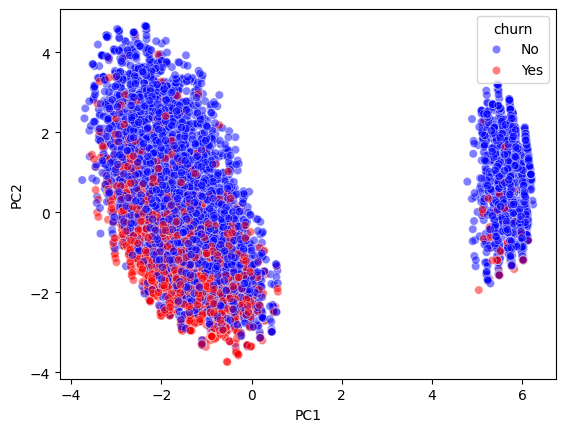

In [15]:
#Plot pca 

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'churn', palette = ['blue', 'red'], alpha = 0.5)

In [16]:
pca.components_[0]

array([-0.07426848, -0.05393481, -0.28260707,  0.00370086, -0.01738551,
        0.04653781,  0.03545957, -0.03545957, -0.10491572, -0.18160313,
        0.31141429,  0.31141429, -0.11788784,  0.31141429, -0.14885739,
        0.31141429, -0.15497114,  0.31141429, -0.12531507,  0.31141429,
       -0.1761097 ,  0.31141429, -0.17704666,  0.00204797,  0.04994345,
       -0.12304338, -0.00898183, -0.10228515,  0.13249794])

In [20]:
loadings = pd.Series(pca.components_[0], index=encoded_data.columns).sort_values(ascending=False)
print("Top positive drivers for PC1:\n", loadings.head())
print("Top negative drivers for PC1:\n", loadings.tail())


Top positive drivers for PC1:
 DeviceProtection_No internet service    0.311414
OnlineBackup_No internet service        0.311414
OnlineSecurity_No internet service      0.311414
InternetService_No                      0.311414
StreamingMovies_No internet service     0.311414
dtype: float64
Top negative drivers for PC1:
 DeviceProtection_Yes          -0.154971
StreamingTV_Yes               -0.176110
StreamingMovies_Yes           -0.177047
InternetService_Fiber optic   -0.181603
MonthlyCharges                -0.282607
dtype: float64
